In [1]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.resnet import ResNet50
from keras.applications import VGG16
from tensorboard import notebook
from tensorflow import keras
import numpy as np
import sys
sys.path.append("/root/autodl-tmp/training_tool/")
from training_tool import load_data, draw_curve, draw_matrix

2023-11-24 13:50:55.954159: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


/root/autodl-tmp/dataset/SARTAJ_dataset/cropped


100%|██████████| 74/74 [00:01<00:00, 72.48it/s]


(2870, 200, 200, 3)
(394, 200, 200, 3)


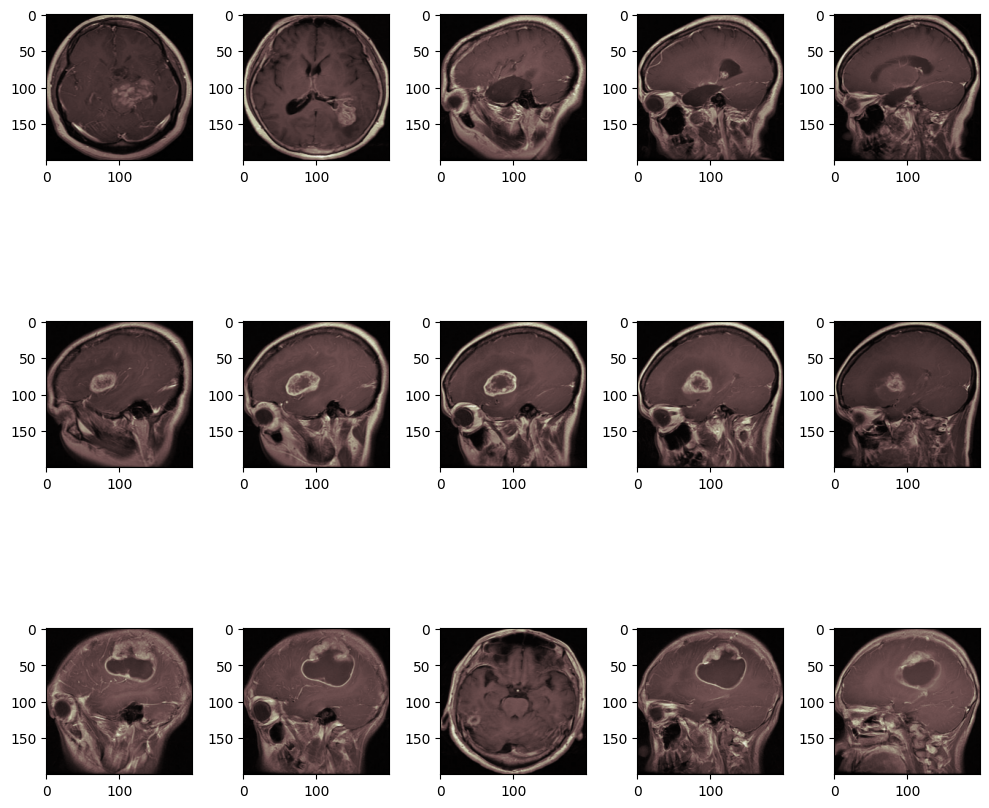

(394, 200, 200, 3)
(2870, 200, 200, 3)
(394, 4)
(2870, 4)


In [2]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
data_path = '/root/autodl-tmp/dataset/SARTAJ_dataset/cropped'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)

In [3]:
net = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# 构建模型结构
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)

# 编译模型
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

2023-11-24 13:51:21.952707: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 13:51:22.457439: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9642 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:3e:00.0, compute capability: 7.5


In [4]:
tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-{epoch:02d}-{val_accuracy:.2f}-{val_loss:.2f}.keras',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50


2023-11-24 13:51:27.089954: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


81/81 [==============================] - ETA: 0s - loss: 1.1011 - accuracy: 0.5033
Epoch 1: val_accuracy improved from -inf to 0.32404, saving model to /content/drive/MyDrive/Multi class Brain tumor Clssification/Other Experiments/3 class/saved model/balanced data/effnetb2v2.h5
81/81 [==============================] - 21s 195ms/step - loss: 1.1011 - accuracy: 0.5033 - val_loss: 1.0300 - val_accuracy: 0.3240 - lr: 1.0000e-04
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.7927 - accuracy: 0.6744
Epoch 2: val_accuracy improved from 0.32404 to 0.50523, saving model to /content/drive/MyDrive/Multi class Brain tumor Clssification/Other Experiments/3 class/saved model/balanced data/effnetb2v2.h5
81/81 [==============================] - 13s 156ms/step - loss: 0.7927 - accuracy: 0.6744 - val_loss: 1.3175 - val_accuracy: 0.5052 - lr: 1.0000e-04
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.5275 - accuracy: 0.8111
Epoch 3: val_accuracy improved from 

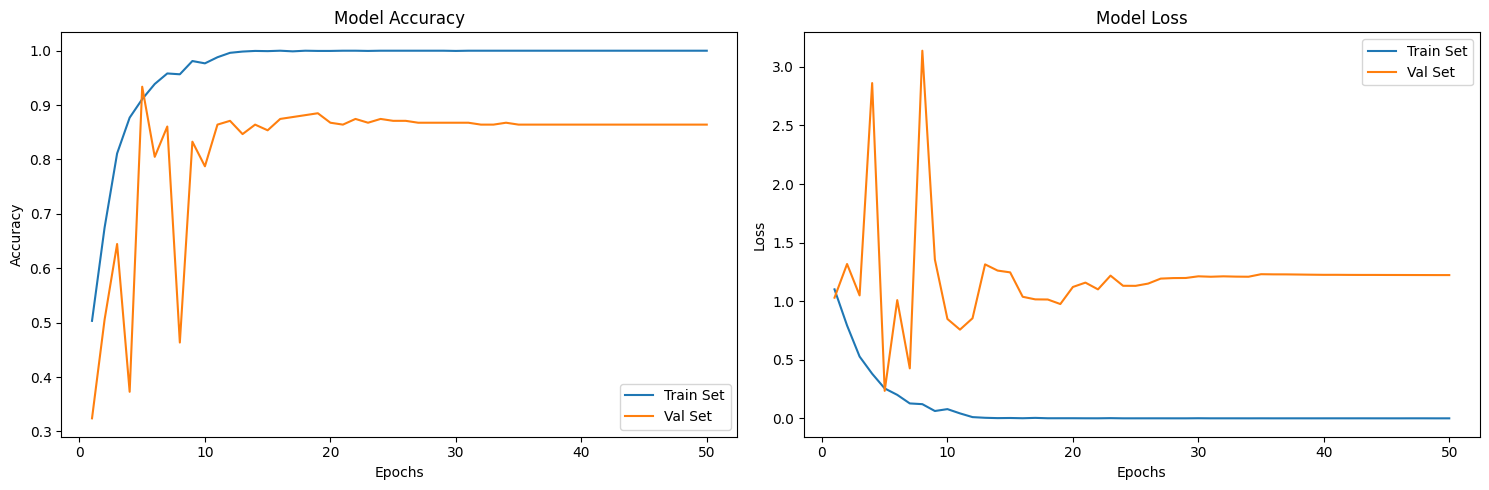

In [5]:
draw_curve(history)

13/13 [==============================] - 1s 51ms/step - loss: 4.4846 - accuracy: 0.7766
Test Accuracy:  77.66
              precision    recall  f1-score   support

      glioma     0.9429    0.3300    0.4889       100
  meningioma     0.6765    1.0000    0.8070       115
     notumor     0.7721    1.0000    0.8714       105
   pituitary     1.0000    0.7162    0.8346        74

    accuracy                         0.7766       394
   macro avg     0.8478    0.7616    0.7505       394
weighted avg     0.8303    0.7766    0.7486       394



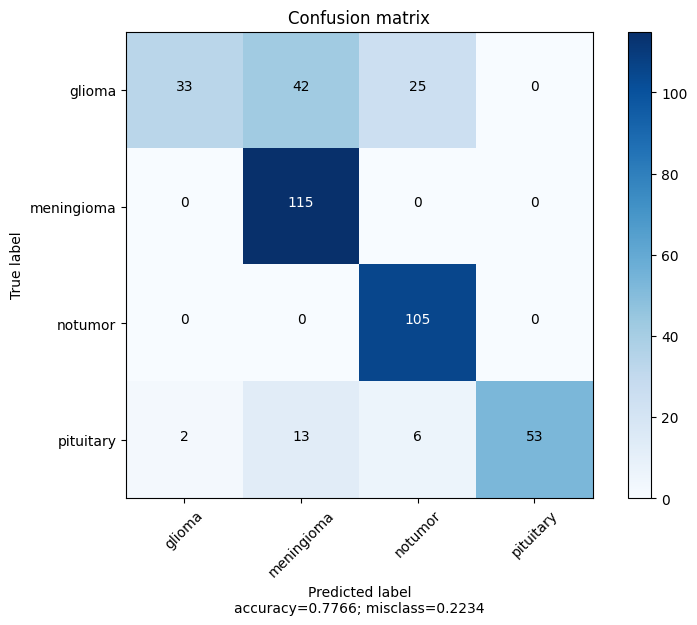

In [6]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)